# TrieTree

This notebook shows how to construct a [trie tree](https://en.wikipedia.org/wiki/Trie) with a list of known strings and then shows how to use the trie tree to match a given string.

## How to run?

All the animations in this notebook are rendered by the [algviz](https://algviz.com/) algorithm animation engine in real time. You can follow this [guidance](https://algviz.com/en/installation.html) to set up your local environment or run this repo on Gitpod directly.

*If you meet any problem, please report an 👉[issue](https://github.com/zjl9959/algviz/issues)👈 here.*

In [ ]:
import algviz

class TrieTree:
    def __init__(self, str_list):
        self.viz = algviz.Visualizer(1)
        table_cols = 0
        for s in str_list:
            table_cols = max(table_cols, len(s))
        self.table = self.viz.createTable(len(str_list), table_cols, str_list, 'String list to construct trie tree', cell_size=(20, 20))
        self.root = algviz.TreeNode('root')
        self.graph = self.viz.createGraph(self.root)
        self.s = self.viz.createVector(name='String to match', cell_size=(20, 20))
        self.construct(str_list)

    def construct(self, str_list):
        for i in range(len(str_list)):
            cur = self.root
            for j in range(len(str_list[i])):
                child_pos = None
                for child in cur.children():
                    if str(child) == str_list[i][j]:
                        child_pos = child
                        break
                if not child_pos:
                    child_pos = algviz.TreeNode(str_list[i][j])
                    cur.add(child_pos)
                cur = child_pos
                self.table.mark(algviz.cAqua, i, j)
                self.graph.markNode(algviz.cAqua, cur)
                self.viz.display()
        self.viz.display()

    def match(self, s):
        self.graph.removeMark(algviz.cLime)
        self.s.clear()
        for c in s:
            self.s.append(c)
        cur = self.root
        i = 0
        while i < len(s):
            match = False
            self.s.removeMark(algviz.cLime)
            self.s.mark(algviz.cLime, i, True)
            for child in cur.children():
                if child.val == s[i]:
                    cur = child
                    i += 1
                    match = True
                    self.graph.markNode(algviz.cLime, cur, True)
                    self.viz.display()
                    break
                else:
                    self.graph.markNode(algviz.cSilver, child)
                    self.viz.display(0.5)
            if not match:
                return False
        return i == len(s)

String list to construct trie tree:

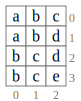

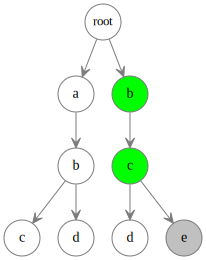

String to match:

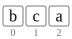

In [2]:
# Construct a tire tree.
str_list = ['abc', 'abd', 'bcd', 'bce']
trie_tree = TrieTree(str_list)

In [3]:
# Match a string: True case
s1 = 'abd'
print('Match str:{} result is:{}'.format(s1, trie_tree.match(s1)))

Match str:abd result is:True


In [4]:
# Match a string: False case
s2 = 'bca'
print('Match str:{} result is:{}'.format(s2, trie_tree.match(s2)))

Match str:bca result is:False
